In [1]:
import tensorflow as tf
import keras
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model
import os, shutil, pathlib
from PIL import Image
import json

np.random.seed(21)

2024-06-02 18:59:38.917813: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# global_best_model.keras download (642 MB):
# https://mega.nz/file/tMp2lQbD#upOPcZM5IR_Rfzts0c9kiCd6qWgwdH6BwHTt2a7CT_4
global_best_model = keras.models.load_model('global_best_model.keras')

2024-06-02 18:59:42.064526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:59:42.105352: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:59:42.105389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:59:42.107389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:59:42.107432: I external/local_xla/xla/stream_executor

In [3]:
global_best_model.summary()

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_79 (InputLayer)     │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_39 (TrueDivide)     │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_39 (Subtract)          │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 8, 8, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_250         │ (None, 131072)         │       524,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_251         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_252         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,304,105 (626.77 MB)

 Trainable params: 54,662,221 (208.52 MB)

 Non-trainable params: 317,440 (1.21 MB)

 Optimizer params: 109,324,444 (417.04 MB)

In [4]:
test_dataset = image_dataset_from_directory(
    r'images_sorted_tvts/test',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical'
)

Found 1480 files belonging to 37 classes.


In [5]:
test_loss, test_accuracy = global_best_model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

I0000 00:00:1717355115.521006   11746 service.cc:145] XLA service 0x7fdb74003900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717355115.521043   11746 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-06-02 19:05:15.550721: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-02 19:05:15.782706: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 3/47 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8872 - loss: 0.0235

I0000 00:00:1717355123.221688   11746 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.8969 - loss: 0.0188
Test Loss: 0.01739126816391945
Test Accuracy: 0.9033783674240112


In [9]:
# Start testing on specific data.

# First, try damaged images
original_dir = r'damaged'
new_base_dir = r'damaged'

categories = ['abyssinian', 'egyptian_mau']

# Quickly convert from jpg
def convert_jpg_to_png(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            jpg_path = os.path.join(directory, filename)
            png_path = os.path.join(directory, os.path.splitext(filename)[0] + ".png")
            try:
                with Image.open(jpg_path) as img:
                    # Remove ICC profile from an image
                    if 'icc_profile' in img.info:
                        del img.info['icc_profile']
                    img.save(png_path, "PNG")
                os.remove(jpg_path)
                print(f"Converted {jpg_path} to {png_path}")
            except Exception as e:
                print(f"Failed to convert {jpg_path}: {str(e)}")

for i in categories:
    category_dir = os.path.join(original_dir, i)
    convert_jpg_to_png(category_dir)

Failed to convert damaged/abyssinian/abyssinian_126.jpg: cannot identify image file 'damaged/abyssinian/abyssinian_126.jpg'
Failed to convert damaged/abyssinian/abyssinian_148.jpg: cannot identify image file 'damaged/abyssinian/abyssinian_148.jpg'
Failed to convert damaged/abyssinian/abyssinian_170.jpg: cannot identify image file 'damaged/abyssinian/abyssinian_170.jpg'
Converted damaged/abyssinian/abyssinian_45.jpg to damaged/abyssinian/abyssinian_45.png
Converted damaged/abyssinian/abyssinian_59.jpg to damaged/abyssinian/abyssinian_59.png
Converted damaged/egyptian_mau/egyptian_mau_137.jpg to damaged/egyptian_mau/egyptian_mau_137.png
Converted damaged/egyptian_mau/egyptian_mau_138.jpg to damaged/egyptian_mau/egyptian_mau_138.png
Converted damaged/egyptian_mau/egyptian_mau_144.jpg to damaged/egyptian_mau/egyptian_mau_144.png
Converted damaged/egyptian_mau/egyptian_mau_168.jpg to damaged/egyptian_mau/egyptian_mau_168.png
Converted damaged/egyptian_mau/egyptian_mau_177.jpg to damaged/egy

In [14]:
# create empty folders for other categories so activation function with 37 neurons can work
categories = ['american_bulldog','american_pit_bull_terrier',
             'basset_hound', 'beagle', 'boxer',
             'chihuahua','english_cocker_spaniel',
             'english_setter', 'german_shorthaired', 'great_pyrenees',
             'havanese', 'japanese_chin', 'keeshond', 'leonberger',
             'miniature_pinscher', 'newfoundland','pomeranian',
             'pug', 'saint_bernard', 'samoyed', 'scottish_terrier',
             'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier',
             'yorkshire_terrier', 'abyssinian', 'bengal', 'birman',
             'bombay', 'british_shorthair', 'egyptian_mau',
             'maine_coon', 'persian', 'ragdoll',
             'russian_blue', 'siamese', 'sphynx']

for category in categories:
    category_dir = os.path.join(original_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)
        print(f"Created directory for category: {category}")
    else:
        print(f"Directory for category '{category}' already exists.")


Created directory for category: american_bulldog
Created directory for category: american_pit_bull_terrier
Created directory for category: basset_hound
Created directory for category: beagle
Created directory for category: boxer
Created directory for category: chihuahua
Created directory for category: english_cocker_spaniel
Created directory for category: english_setter
Created directory for category: german_shorthaired
Created directory for category: great_pyrenees
Created directory for category: havanese
Created directory for category: japanese_chin
Created directory for category: keeshond
Created directory for category: leonberger
Created directory for category: miniature_pinscher
Created directory for category: newfoundland
Created directory for category: pomeranian
Created directory for category: pug
Created directory for category: saint_bernard
Created directory for category: samoyed
Created directory for category: scottish_terrier
Created directory for category: shiba_inu
Create

In [15]:
damaged_dataset = image_dataset_from_directory(
    r'damaged',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical'
)

Found 9 files belonging to 37 classes.


In [16]:
test_loss, test_accuracy = global_best_model.evaluate(damaged_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8889 - loss: 0.0163
Test Loss: 0.016299022361636162
Test Accuracy: 0.8888888955116272


In [37]:
categories = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier',
              'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer',
              'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel',
              'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
              'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher',
              'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue',
              'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese',
              'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

def display_actual_vs_predicted(model, dataset, num_samples=1):
    sample_images, sample_labels = next(iter(dataset.take(num_samples)))
    predictions = model.predict(sample_images)
    true_labels = np.argmax(sample_labels, axis=1)
    predicted_labels = np.argmax(predictions, axis=1)
    
    num_rows = (num_samples + 3) // 4
    num_cols = 4
    plt.figure(figsize=(16, 4 * num_rows))
    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(sample_images[i].numpy().astype("uint8"))
        plt.title(f"True: {categories[true_labels[i]]}, Pred: {categories[predicted_labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


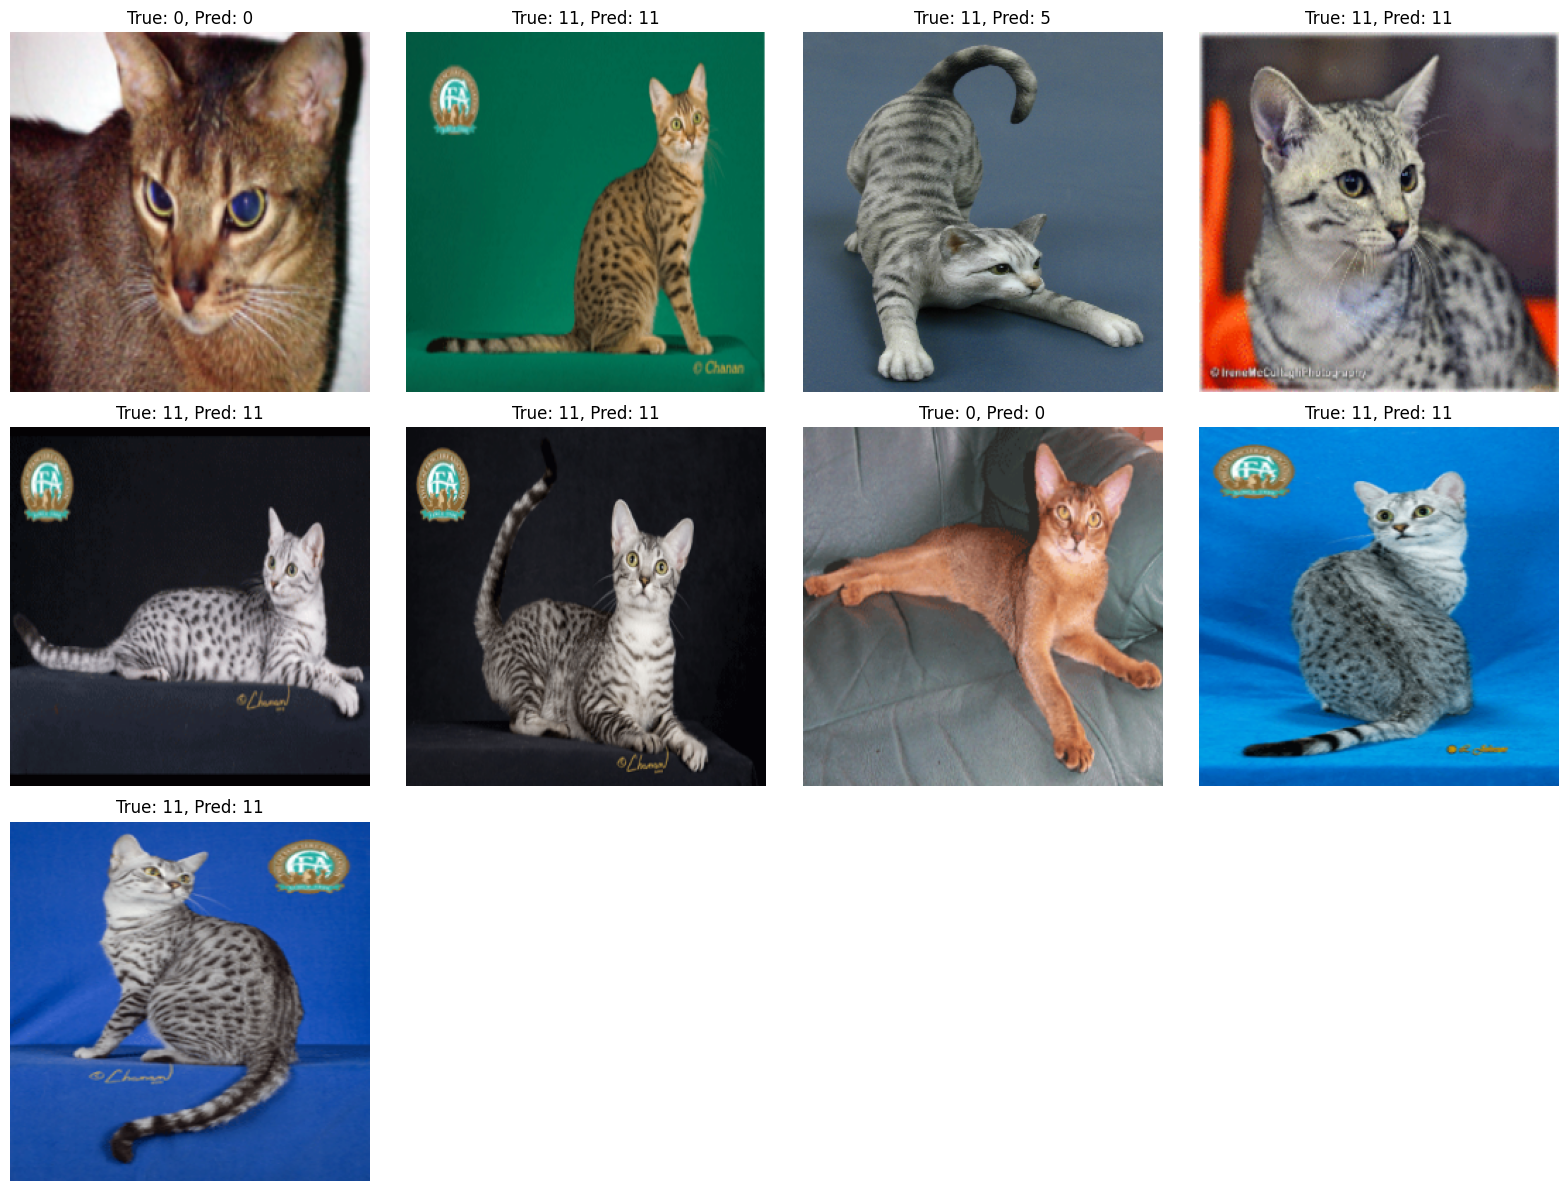

In [38]:
display_actual_vs_predicted(global_best_model, damaged_dataset, 9)